In [8]:
import pandas as pd
import numpy as np
import requests
DATA = './data'
import zipfile36 as zipfle

### Download data & unzip the data

In [12]:
file_name=f'{DATA}/717159_1248718_bundle_archive.zip'
z = zipfle.ZipFile(file_name)
z.extractall(path=f'{DATA}/')
DATA_FILE = f'{DATA}/home/sdf/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv'

### view the data

In [14]:
raw_df = pd.read_csv(DATA_FILE)

In [44]:
p_df = raw_df.copy()

In [46]:
p_df['Key Skills'] = p_df['Key Skills'].str.lower()
p_df = p_df[p_df['Key Skills'].str.contains('python') | p_df['Key Skills'].str.contains('pandas')]
p_df.rename(columns={'Job Experience Required': 'Experience'}, inplace=True)
p_df.dropna(inplace=True)

<ipython-input-46-f35c076cc0b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['Key Skills'] = p_df['Key Skills'].str.lower()


## Experience range

In [62]:
lowers=[]
highers =[]
for idx, row in p_df[['Experience']].iterrows():
    s = row['Experience']
    delimiter = ''
    s = s.replace(' ','')
    s = s.replace('yrs','' )
    s = s.replace('Years','')
    if  ',' in s:
        delimiter = ','
    elif '-' in s:
        delimiter = '-'
    if delimiter:
        lower, higher = s.split(delimiter)
    else:
        lower = s
        higher = 99
    lowers.append(int(lower))
    highers.append(int(higher))
    
p_df['exp_lower'] = lowers
p_df['exp_higher'] = highers

In [69]:
p_df.sort_values(by=['exp_higher','exp_lower'] , ascending=False)
loc_df = p_df.groupby(by=['Location'] ).count()

In [66]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 38 to 29992
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Uniq Id          1173 non-null   object
 1   Crawl Timestamp  1173 non-null   object
 2   Job Title        1173 non-null   object
 3   Job Salary       1173 non-null   object
 4   Experience       1173 non-null   object
 5   Key Skills       1173 non-null   object
 6   Role Category    1173 non-null   object
 7   Location         1173 non-null   object
 8   Functional Area  1173 non-null   object
 9   Industry         1173 non-null   object
 10  Role             1173 non-null   object
 11  exp_lower        1173 non-null   int64 
 12  exp_higher       1173 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 128.3+ KB


## Plot using seaborn

In [85]:
import matplotlib.pyplot as plt
import seaborn as snb
top_10_df = loc_df.sort_values(by='Location', ascending=False).iloc[:10,:]

In [90]:
top_10_df

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Experience,Key Skills,Role Category,Functional Area,Industry,Role,exp_lower,exp_higher
Location,,,,,,,,,,,,
Thane,1,1,1,1,1,1,1,1,1,1,1,1
"Pune,India",1,1,1,1,1,1,1,1,1,1,1,1
Pune (Shiva Nagar),1,1,1,1,1,1,1,1,1,1,1,1
Pune,123,123,123,123,123,123,123,123,123,123,123,123
"Noida,Noida/Greater Noida",1,1,1,1,1,1,1,1,1,1,1,1
"Noida,Lucknow",1,1,1,1,1,1,1,1,1,1,1,1
"Noida,Gurgaon",1,1,1,1,1,1,1,1,1,1,1,1
"Noida,Bengaluru,Hyderabad",1,1,1,1,1,1,1,1,1,1,1,1
Noida (Sector-62 Noida),1,1,1,1,1,1,1,1,1,1,1,1


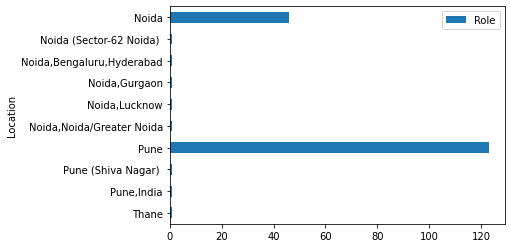

In [95]:
top_10_df[['Role']].plot(kind='barh')

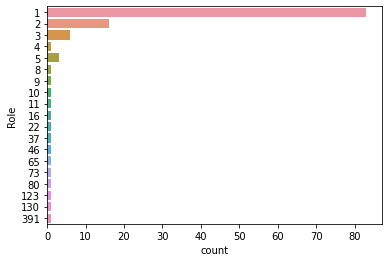

In [100]:
snb.countplot(y=loc_df['Role'])